In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


**Tasks to Explore** (from dataset provider)

1. Can we predict the power generation the next couple of days? - this allows for better grid management.
2. Can we identify the need for panel cleaning / maintenance?
3. Can we identify faulty or suboptimally performing equipment? 

In [12]:
generation1 = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
generation1.head()

#generation2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
#generation2.head()

#weather1 = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
#weather1.head()

#weather2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
#weather2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Converting date/time column for both **generation1** and **weather1**.

In [13]:
generation1['DATE_TIME'] = pd.to_datetime(generation1['DATE_TIME'], dayfirst = True)
generation1.head()

weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'], yearfirst = True)
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


Text(0, 0.5, 'Total Yield')

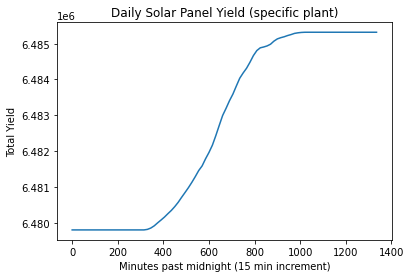

In [33]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# grabbing first source key '1BY6WEcLGh8j5v7' a specific plant
# sorting dataframe by DATE_TIME (24 hour period)
# one full day of reading for only one source key or 90 rows

specific_plant = generation1[generation1['SOURCE_KEY'] == (generation1.SOURCE_KEY).unique()[0]].sort_values(by = 'DATE_TIME').tail(90).reset_index()

# loop through specific plant in 15 minute increments
for index, row in specific_plant.iterrows():
    specific_plant.at[index, 'Minutes'] = index*15

# Plot
sns.lineplot(x = 'Minutes', y = 'TOTAL_YIELD', data = specific_plant)
plt.title("Daily Solar Panel Yield (specific plant)")
plt.xlabel("Minutes past midnight (15 min increment)")
plt.ylabel("Total Yield")

<Figure size 360x720 with 0 Axes>

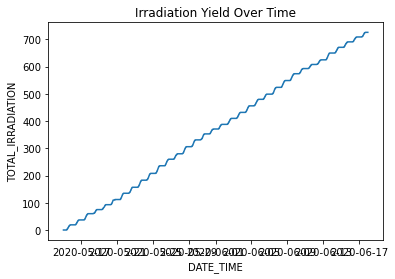

<Figure size 360x720 with 0 Axes>

In [42]:
# create 'Total Irradiation' column
weather1['TOTAL_IRRADIATION'] = 0


# loop through weather1 to plot Total Irradiation over time
run_sum = 0
i = 1
while i <= 3182:
    run_sum = run_sum + weather1['IRRADIATION'].iloc[i-1]
    i += 1
    weather1.at[i, 'TOTAL_IRRADIATION'] = run_sum
    
sns.lineplot(x = 'DATE_TIME', y = 'TOTAL_IRRADIATION', data = weather1)
plt.title('Irradiation Yield Over Time')


Merge **specific_plant** and **weather1** dataframes to compare plant's power output

In [43]:
# left_join specific_plant and weather1 on 'DATE_TIME' column
merged = specific_plant.merge(right = weather1, how = 'left', on = 'DATE_TIME')
merged

,index,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Minutes,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TOTAL_IRRADIATION
0,66798,2020-06-17 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,0.0,4135001.0,HmiyD2TTLFNqkNe,22.771452,21.472048,0.0,709
1,66820,2020-06-17 01:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,15.0,4135001.0,HmiyD2TTLFNqkNe,22.741874,21.349182,0.0,709
2,66842,2020-06-17 01:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,30.0,4135001.0,HmiyD2TTLFNqkNe,22.687185,21.247636,0.0,709
3,66864,2020-06-17 01:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,45.0,4135001.0,HmiyD2TTLFNqkNe,22.602610,21.096277,0.0,709
4,66886,2020-06-17 02:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6479798.0,60.0,4135001.0,HmiyD2TTLFNqkNe,22.626906,21.193654,0.0,709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,68668,2020-06-17 22:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,1275.0,4135001.0,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,726
86,68690,2020-06-17 23:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,1290.0,4135001.0,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,726
87,68712,2020-06-17 23:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,1305.0,4135001.0,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,726
88,68734,2020-06-17 23:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,1320.0,4135001.0,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,726


In [44]:
# Select only three needed columns
merged = merged[['PLANT_ID_x', 'TOTAL_YIELD', 'TOTAL_IRRADIATION']].dropna()
merged

,PLANT_ID_x,TOTAL_YIELD,TOTAL_IRRADIATION
0,4135001,6479798.0,709
1,4135001,6479798.0,709
2,4135001,6479798.0,709
3,4135001,6479798.0,709
4,4135001,6479798.0,709
...,...,...,...
85,4135001,6485319.0,726
86,4135001,6485319.0,726
87,4135001,6485319.0,726
88,4135001,6485319.0,726


In [47]:
X = merged['TOTAL_IRRADIATION'].values.reshape(-1,1)
y = merged['TOTAL_YIELD'].values.reshape(-1,1)

array([[320.49029818]])

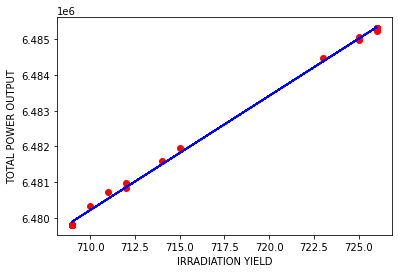

In [48]:
# ML Linear Regression

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 3/4)
lin_reg.fit(X_train, y_train)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.xlabel('IRRADIATION YIELD')
plt.ylabel('TOTAL POWER OUTPUT')


from sklearn.metrics import r2_score

y_true = y_test
y_pred = lin_reg.predict(X_test)
r2_score(y_true, y_pred)
lin_reg.coef_

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_true, y_pred))
rms

19220.13043474445